In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from itertools import cycle



2025-05-04 13:59:26.217043: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 13:59:26.217495: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-04 13:59:26.219548: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-04 13:59:26.224834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746356366.233724   66344 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746356366.23

In [4]:
# Verileri yükleme fonksiyonu
def load_images(folder_path):
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if not os.path.isdir(label_folder):
            continue
        for file in os.listdir(label_folder):
            img_path = os.path.join(label_folder, file)
            try:
                img = Image.open(img_path).resize((102, 136))
                img = np.array(img)
                if img.shape == (136, 102, 3):
                    images.append(img)
                    labels.append(label)
            except:
                continue
    return np.array(images), np.array(labels)

# Veriyi yükle
X, y = load_images("dataset")



In [5]:
# Normalizasyon
X = X / 255.0

# Etiketleri sayısal hale getir
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=3)



In [6]:
# Eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)



In [7]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True, # ***
    fill_mode='nearest'
)



In [8]:
# Model oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(136, 102, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



/home/seda-ozkaya/PycharmProjects/CNN3/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1746356396.515163   66344 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746356396.515542   66344 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# Modeli eğitme
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test)
)



Epoch 1/10


/home/seda-ozkaya/PycharmProjects/CNN3/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.6161 - loss: 0.8789 - val_accuracy: 0.8360 - val_loss: 0.3942
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.7998 - loss: 0.4892 - val_accuracy: 0.8820 - val_loss: 0.2956
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.8377 - loss: 0.4065 - val_accuracy: 0.9030 - val_loss: 0.2548
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.8658 - loss: 0.3600 - val_accuracy: 0.9200 - val_loss: 0.2140
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.8753 - loss: 0.3263 - val_accuracy: 0.9137 - val_loss: 0.2201
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.8814 - loss: 0.3098 - val_accuracy: 0.9323 - val_loss: 0.1833
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.8928 - loss: 0.2917 - val_accuracy: 0.9383 - val_loss: 0.1726
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.8960 - loss: 0.2737 - val_accurac

In [10]:
# Modeli değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Doğruluğu (Test Accuracy): %{:.2f}".format(test_acc * 100))




Test Doğruluğu (Test Accuracy): %95.67


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


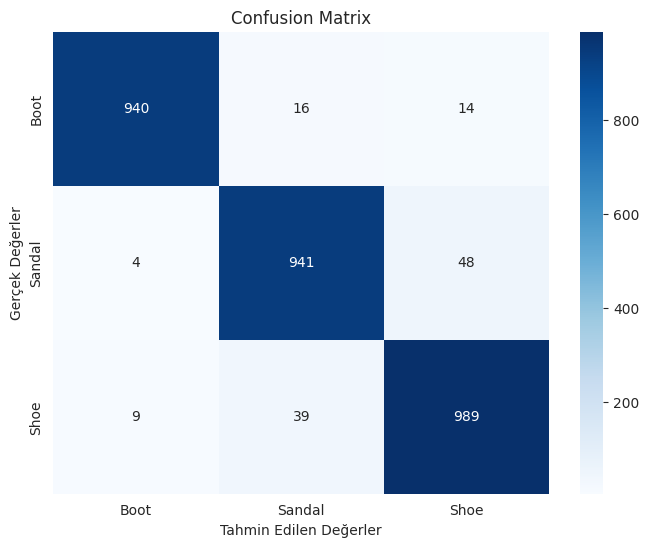


Classification Report:
              precision    recall  f1-score   support

        Boot       0.99      0.97      0.98       970
      Sandal       0.94      0.95      0.95       993
        Shoe       0.94      0.95      0.95      1037

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [11]:

# 1. Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))





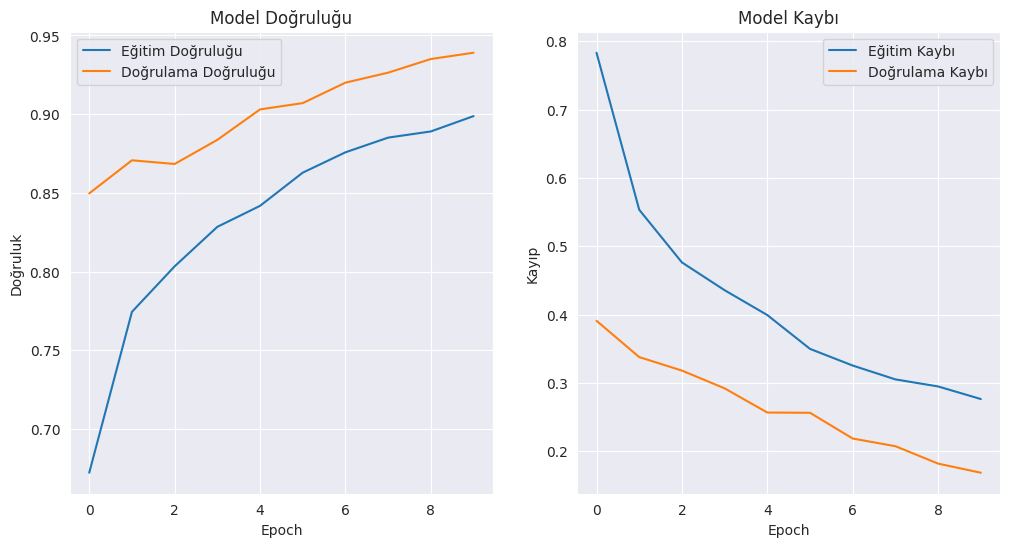

In [11]:
# 4. Loss Function Grafiği
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend()



plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
(plt.legend())

plt.show()



In [12]:
# Modeli kaydet
model.save("shoe_model_complete.h5")
print("Model başarıyla kaydedildi.")

Model başarıyla kaydedildi.
